In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# 수치정보
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# null 값 제거
titanic.dropna().describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [7]:
# 수치값 분포
titanic.var()

/var/folders/sj/p14d4zwn3cgf9bdypb5sjlp40000gn/T/ipykernel_14395/683663687.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic.var()


survived         0.236772
pclass           0.699015
age            211.019125
sibsp            1.216043
parch            0.649728
fare          2469.436846
adult_male       0.239723
alone            0.239723
dtype: float64

In [8]:
# 평균절대편차
titanic.mad()

survived       0.473013
pclass         0.761968
age           11.322944
sibsp          0.713780
parch          0.580742
fare          28.163692
adult_male     0.478908
alone          0.478908
dtype: float64

In [9]:
# 클래스별로 몇 명이 탔지?
titanic.groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


<AxesSubplot:xlabel='count', ylabel='class'>

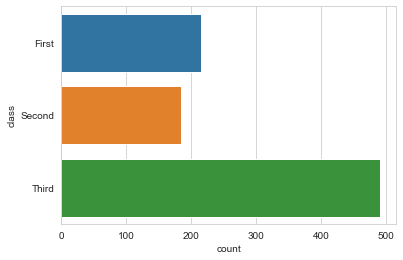

In [10]:
sns.countplot(y='class', data=titanic)

<AxesSubplot:xlabel='count', ylabel='sex'>

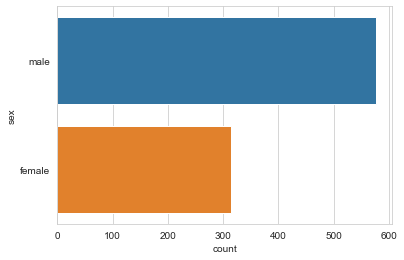

In [11]:
sns.countplot(y='sex',data=titanic)

<AxesSubplot:xlabel='count', ylabel='alive'>

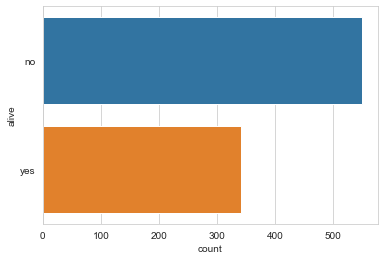

In [12]:
sns.countplot(y='alive',data=titanic)

<AxesSubplot:xlabel='count', ylabel='alone'>

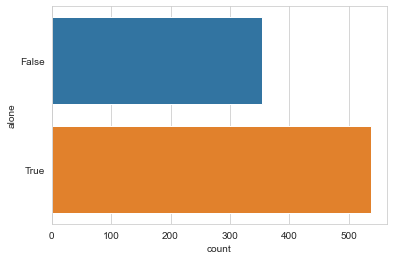

In [13]:
sns.countplot(y='alone',data=titanic)

In [14]:
# 표준 편차
titanic.groupby('class').std()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.484026,0.0,14.802856,0.611898,0.693997,78.380373,0.498555,0.501140
Second,0.500623,0.0,14.001077,0.601633,0.690963,13.417399,0.499911,0.497081
Third,0.428949,0.0,12.495398,1.374883,0.888861,11.778142,0.477552,0.474233


In [15]:
# 클래스별 가격의 중앙값
titanic.groupby('class')['fare'].median()

class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64

In [16]:
# alive가 yes사람들
titanic.query("alive == 'yes'")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [17]:
titanic.query("alive == 'yes'").groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,134,136,136,117,134,136,136
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119


In [18]:
titanic.groupby('class')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
Second,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
Third,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [19]:
titanic.query("alive == 'yes'").groupby('class').describe()

survived                                    pclass       ... parch  \
          count mean  std  min  25%  50%  75%  max  count mean  ...   75%   
class                                                           ...         
First     136.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  136.0  1.0  ...   1.0   
Second     87.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   87.0  2.0  ...   1.0   
Third     119.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  119.0  3.0  ...   1.0   

              fare                                                    \
        max  count       mean        std      min       25%      50%   
class                                                                  
First   2.0  136.0  95.608029  85.286820  25.9292  50.98545  77.9583   
Second  3.0   87.0  22.055700  10.853502  10.5000  13.00000  21.0000   
Third   5.0  119.0  13.694887  10.692993   0.0000   7.77500   8.5167   

                              
               75%       max  
class                         
First   111.481225  512.3292  
Second   26.250000   65.0000  
Third    15.875000   56.4958  

[3 rows x 48 columns]

In [20]:
titanic.groupby('sex')['age'].aggregate([min, np.median, max])

,min,median,max
sex,,,
female,0.75,27.0,63.0
male,0.42,29.0,80.0


In [21]:
titanic.query("age>30").groupby('class').median()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,1.0,1.0,45.0,0.0,0.0,56.9292,1.0,0.0
Second,0.0,2.0,39.0,0.0,0.0,14.0000,1.0,1.0
Third,0.0,3.0,38.0,0.0,0.0,8.0500,1.0,1.0


In [22]:
titanic.query("fare<20").groupby('class').median()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.0,1.0,38.5,0.0,0.0,0.0000,1.0,1.0
Second,0.0,2.0,30.0,0.0,0.0,13.0000,1.0,1.0
Third,0.0,3.0,25.0,0.0,0.0,7.8958,1.0,1.0


In [23]:
titanic.groupby(['class','sex'])['age'].mean().unstack()

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


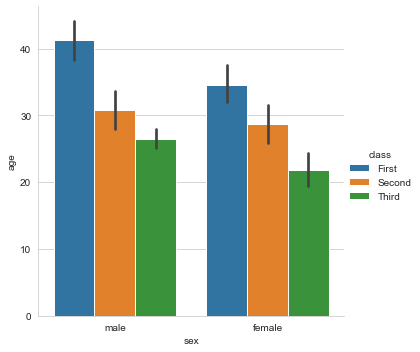

In [24]:
sns.catplot(x='sex', y='age', hue='class', kind='bar',data=titanic)

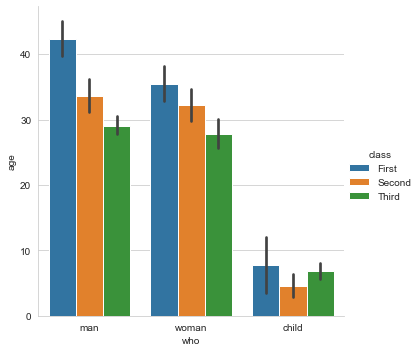

In [25]:
sns.catplot(x='who', y='age', hue='class', kind='bar',data=titanic)

In [26]:
titanic.groupby(['class','sex'])['fare'].mean().unstack()

sex,female,male
class,,
First,106.125798,67.226127
Second,21.970121,19.741782
Third,16.118810,12.661633


In [27]:
titanic.groupby(['class','who'])['fare'].mean().unstack()
# 남자가 비용이 저렴..? 그래서 남자가 많이 탓나?

who,child,man,woman
class,,,
First,139.382633,65.951086,104.317995
Second,28.323905,19.054124,20.868624
Third,23.220190,11.340213,15.354351


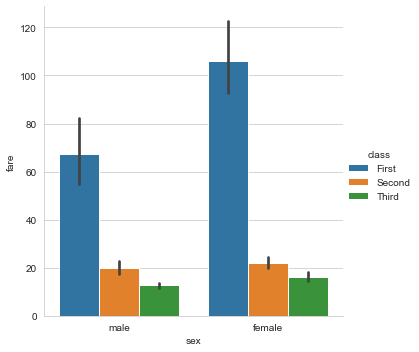

In [28]:
sns.catplot(x='sex', y='fare', hue='class', kind='bar', data=titanic)

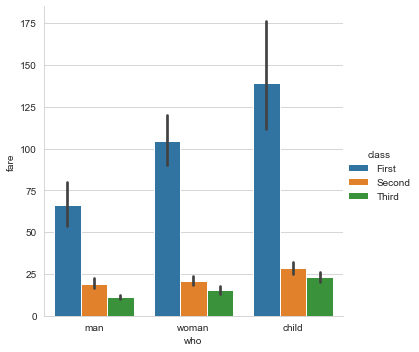

In [29]:
sns.catplot(x='who', y='fare', hue='class', kind='bar', data=titanic)
# 아이들과 여성이 운임비용을 많이 냈다!

In [30]:
titanic.groupby(['class','sex'])['survived'].mean().unstack()
# unstack() : 표로 바꿔줌
# 생존은 남자보단 여자가 많이 생존함!

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [31]:
titanic.pivot_table('survived',index='class',columns='sex')

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


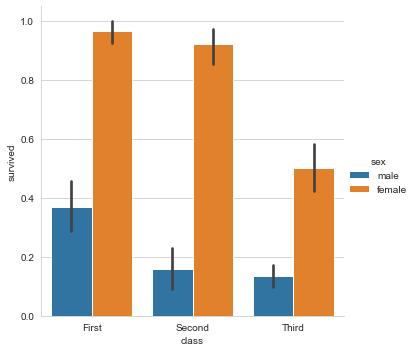

In [32]:
sns.catplot(x='class', y='survived', hue='sex', kind='bar', data=titanic)
# 여성이 생존을 더 많이 함!

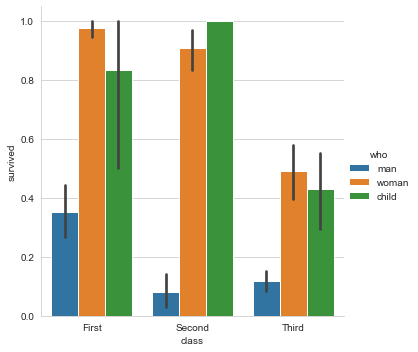

In [33]:
sns.catplot(x='class', y='survived', hue='who', kind='bar', data=titanic)
# 아이들도 많이 생존함

In [34]:
age = pd.cut(titanic['age'], [0,18,40,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 40]  0.979167  0.914894  0.480000
       (40, 80]  0.961538  0.846154  0.111111
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 40]  0.478261  0.063492  0.146199
       (40, 80]  0.280000  0.095238  0.064516

In [35]:
age = pd.cut(titanic['age'], [0,18,40,80])
titanic.pivot_table('survived',['who',age],'class')

class              First    Second     Third
who   age                                   
child (0, 18]   0.833333  1.000000  0.431034
man   (0, 18]   0.500000  0.000000  0.086957
      (18, 40]  0.478261  0.063492  0.146199
      (40, 80]  0.280000  0.095238  0.064516
woman (0, 18]   1.000000  1.000000  0.461538
      (18, 40]  0.979167  0.914894  0.480000
      (40, 80]  0.961538  0.846154  0.111111

In [38]:
fare = pd.qcut(titanic['fare'], 3)
titanic.pivot_table('survived',['who',age],[fare,'class'])
# 코드 해석 및 결과 해석 필요함

fare           (-0.001, 8.662]           (8.662, 26.0]                      \
class                    First     Third         First    Second     Third   
who   age                                                                    
child (0, 18]              NaN  0.666667           NaN  1.000000  0.703704   
man   (0, 18]              NaN  0.125000           NaN  0.000000  0.000000   
      (18, 40]             0.0  0.138462           NaN  0.078431  0.114286   
      (40, 80]             NaN  0.074074           0.0  0.111111  0.000000   
woman (0, 18]              NaN  0.666667           NaN  1.000000  0.333333   
      (18, 40]             NaN  0.550000           NaN  0.894737  0.461538   
      (40, 80]             NaN  0.000000           1.0  0.818182  0.250000   

fare           (26.0, 512.329]               
class                    First Second Third  
who   age                                    
child (0, 18]         0.833333    1.0  0.08  
man   (0, 18]         0.500000    0.0  0.00  
      (18, 40]        0.523810    0.0  0.50  
      (40, 80]        0.291667    0.0   NaN  
woman (0, 18]         1.000000    NaN  0.00  
      (18, 40]        0.979167    1.0  0.25  
      (40, 80]        0.958333    1.0  0.00

In [39]:
titanic.pivot_table('survived',index='who',columns='class',margins=True)

class,First,Second,Third,All
who,,,,
child,0.833333,1.000000,0.431034,0.590361
man,0.352941,0.080808,0.119122,0.163873
woman,0.978022,0.909091,0.491228,0.756458
All,0.629630,0.472826,0.242363,0.383838


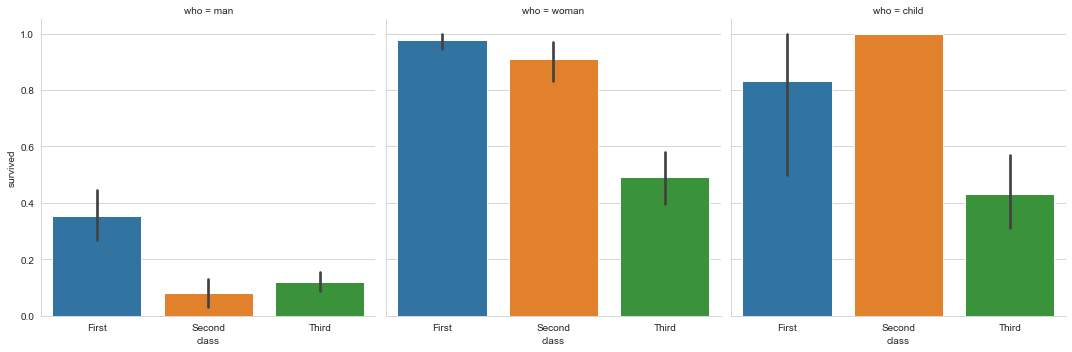

In [40]:
sns.catplot(x='class', y='survived', col='who', kind='bar', data=titanic)
# 확실히 여자와 아이들이 생존을 많이 했다.

In [41]:
titanic.pivot_table('survived',index='deck', columns='class',margins=True)
# class에 따른 deck위치가 정해져있다..

class,First,Second,Third,All
deck,,,,
A,0.466667,NaN,NaN,0.466667
B,0.744681,NaN,NaN,0.744681
C,0.593220,NaN,NaN,0.593220
D,0.758621,0.7500,NaN,0.757576
E,0.720000,0.7500,1.0,0.750000
F,NaN,0.8750,0.2,0.615385
G,NaN,NaN,0.5,0.500000
All,0.668571,0.8125,0.5,0.669951


<AxesSubplot:xlabel='count', ylabel='deck'>

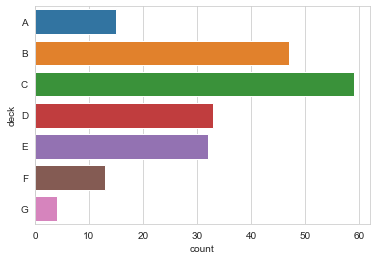

In [42]:
sns.countplot(y='deck', data=titanic)

<AxesSubplot:xlabel='count', ylabel='deck'>

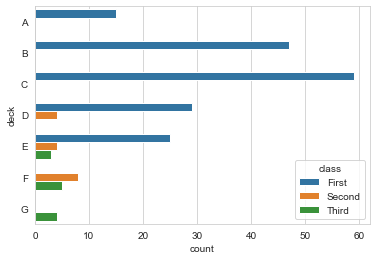

In [43]:
sns.countplot(y='deck', hue='class', data=titanic)

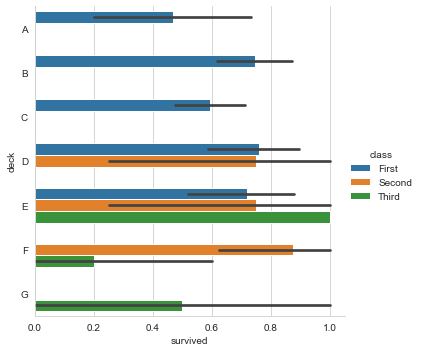

In [44]:
sns.catplot(x='survived', y='deck',
           hue='class', kind='bar', data=titanic)
# F G 가 생존자가 적다? -> 타격을 입음?

In [46]:
titanic.pivot_table('survived',index='embark_town',columns='class',margins=True)

class,First,Second,Third,All
embark_town,,,,
Cherbourg,0.694118,0.529412,0.378788,0.553571
Queenstown,0.500000,0.666667,0.375000,0.389610
Southampton,0.582677,0.463415,0.189802,0.336957
All,0.626168,0.472826,0.242363,0.382452


<AxesSubplot:xlabel='count', ylabel='embark_town'>

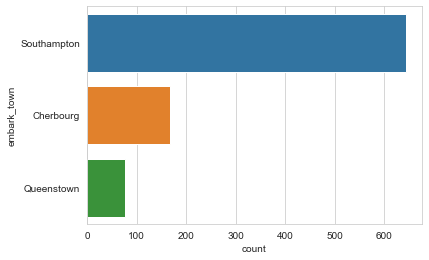

In [47]:
sns.countplot(y='embark_town', data=titanic)

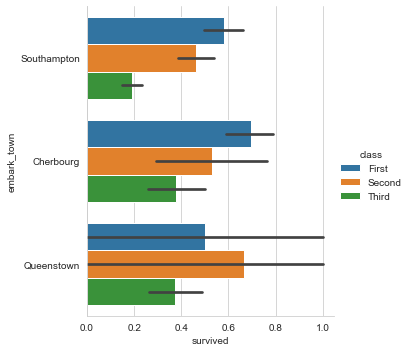

In [49]:
sns.catplot(x='survived',y='embark_town',
           hue='class',kind='bar', data=titanic)
# 생존여부와 embark_town 상관관계가 적다

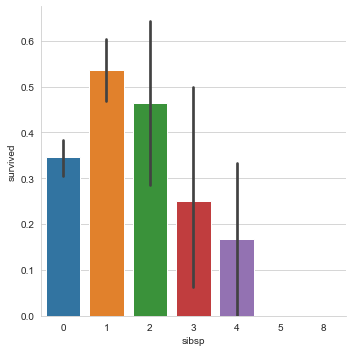

In [50]:
sns.catplot(x='sibsp', y='survived',
           kind='bar',data=titanic)

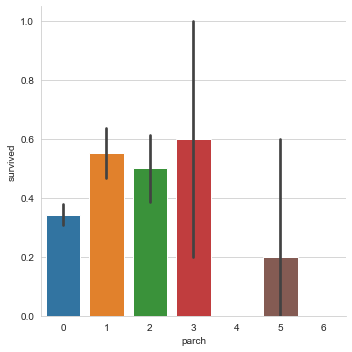

In [52]:
sns.catplot(x='parch', y='survived',
           kind='bar',data=titanic)
# 가운데 선이 길다는 것은 분포도가 너무 광범위하다? 찾아볼 것!

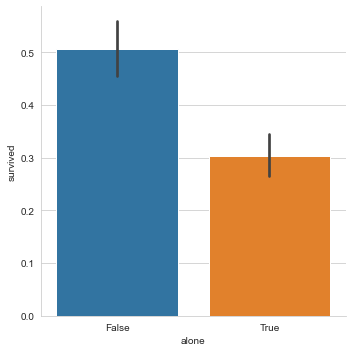

In [53]:
sns.catplot(x='alone', y='survived',
           kind='bar',data=titanic)
# 동반자가 있을때가 생존자가 많다.

결과
1. Third class가 많이 탔다
2. 남자가 많이 탔다
3. 여자와 어린아이의 fare값은 남자의 fare값보다 비싸다
4. 여성과 아이들의 생존을 많이 했다.
5. deck도 생존에 관여를 한다.
6. embark_town은 생존과 관여가 적다
7. 혼자보단 동반자가 있을때가 생존률이 크다.